In [39]:
import numpy as np
import ForwardPassUtils as fpu
import torch
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, cKDTree

def sdf_rec(p, b):
    #b is half side length to facilitate the computation of the distance in all 4 quadrants
    d = np.abs(p) - np.array(b)/2
    return np.linalg.norm(np.maximum(d, 0)) + min(max(d[0], d[1]), 0)
    #return np.linalg.norm(np.maximum(np.abs(p) - b, 0))

def sdf_box(p,b):
    q = np.abs(p) - b
    return np.linalg.norm(np.maximum(q,0)) + min(max(q[0],max(q[1],q[2])),0)

def sdCircle(p, r):
    return np.linalg.norm(p) - r

def distance_to_nearest_point(x, y, points):
    distances = np.sqrt((x - points[:, 0, np.newaxis, np.newaxis])**2 + (y - points[:, 1, np.newaxis, np.newaxis])**2)
    return np.min(distances, axis=0)

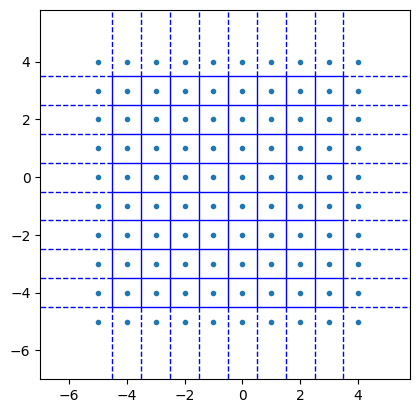

In [40]:

mini = -5
maxi = 5
points = [(x, y) for x in range(mini, maxi) for y in range(mini,maxi)]
voronoi_initial = Voronoi(points)
minX, maxX, minY, maxY = fpu.computeMinMax(voronoi_initial)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
plt.xlim(minX-1, maxX+1)
plt.ylim(minY-1, maxY+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [41]:
#rect dimension
b = [7.0, 5.0]
r = 2.0

# Example points
points = [(x, y) for x in range(-5,5) for y in range(-5,5)]
# Add the third dimension (SDF value)
points_with_sdf = [(x, y, sdf_rec(np.array([x, y]), b)) for x, y in points]


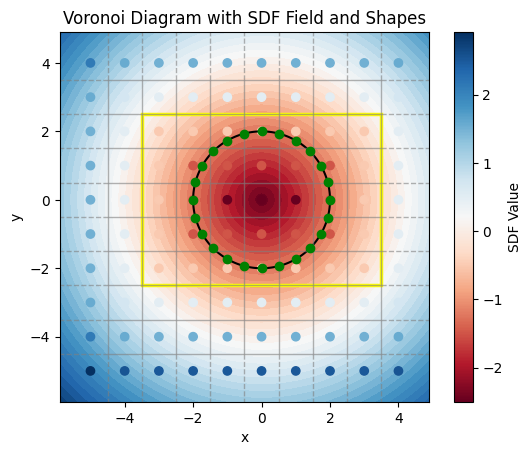

In [ ]:
# Separate the points and their SDF values
xy_points = np.array([[x, y] for x, y, sdf in points_with_sdf])
sdf_values = np.array([sdf for x, y, sdf in points_with_sdf])

# Compute Voronoi diagram
vor = Voronoi(xy_points)

# Define grid
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = fpu.sdf_circle(X, Y, radius=r)

# Plot Voronoi diagram
fig, ax = plt.subplots()

# Plot the SDF field
plt.contourf(X, Y, Z, levels=50, cmap='RdBu')

# Plot the zero level set (the circle boundary)
ax.contour(X, Y, Z, levels=[0], colors='black')
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='grey', line_width=1, line_alpha=0.6, point_size=0)

# Create a rectangle centered at origin with dimensions 2*b 
# draw the rectangle by doing a zero crossing on the sdf
rectangle = plt.Rectangle((-b[0]/2,-b[1]/2), b[0], b[1], edgecolor='yellow', facecolor='none', linewidth=2.5)
ax.add_patch(rectangle)

# plot the target point on the circle surface
n_points = 24
theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
target_points = np.array([r*np.cos(theta), r*np.sin(theta)]).T
ax.plot(target_points[:, 0], target_points[:, 1], 'go') 

# Create scatter plot of points colored by their SDF value
sc = ax.scatter(xy_points[:, 0], xy_points[:, 1], c=sdf_values, cmap='RdBu')

# Add color bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('SDF Value')
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram with SDF Field and Shapes')

#plt.grid(True)
plt.show()


In [ ]:
#from the sites positions, compute all the vertex of the voronoi diagram
